In [1]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt  
    import seaborn as sns


In [2]:
gdp_df=pd.read_csv('../data/gdp_percapita.csv')

Determining how many rows and columns

In [4]:
gdp_df.shape

(7662, 4)

Examining the data types

In [6]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


In [7]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [8]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [9]:
gdp_df.describe()

,Year,Value,Value Footnotes
count,7662.000000,7662.000000,0.0
mean,2006.388280,17206.979219,NaN
std,9.418727,19363.258695,NaN
min,1990.000000,436.376416,NaN
25%,1998.000000,3655.268993,NaN
50%,2007.000000,10132.449293,NaN
75%,2015.000000,24119.515045,NaN
max,2022.000000,157602.482546,NaN


Dropping the value footnotes column

In [11]:
gdp_df = gdp_df.drop('Value Footnotes', axis=1)
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


Renaming the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'

In [13]:
gdp_df_rename = gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})
gdp_df_rename.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


How many countries have data for all years? Which countries are missing many years of data? Identifying number of observations per year.

In [15]:
# Count of the total years in the dataset
gdp_df['Year'].nunique()

33

In [16]:
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [17]:
# Number of years represented for each country
gdp_df_year_counts = gdp_df.groupby(['Country or Area']).count().sort_values(by = 'Year')
gdp_df_year_counts

,Year,Value
Country or Area,,
Djibouti,10,10
Somalia,10,10
Turks and Caicos Islands,12,12
Sint Maarten (Dutch part),14,14
Kosovo,15,15
...,...,...
Jamaica,33,33
Japan,33,33
Jordan,33,33


SQL Equivalent:
SELECT Country, COUNT(Year), COUNT(GDP_Per_Capita)
FROM gdp_df
GROUP BY Country
ORDER BY Year

In [19]:
# Only the countries that have data for all years
gdp_df_year_counts[gdp_df_year_counts['Year'] == 33]

,Year,Value
Country or Area,,
Papua New Guinea,33,33
Pakistan,33,33
Australia,33,33
Pacific island small states,33,33
Austria,33,33
...,...,...
Jamaica,33,33
Japan,33,33
Jordan,33,33


In [20]:
# Only the countries that do not have data for all years
gdp_df_year_counts[gdp_df_year_counts['Year'] < 33]

,Year,Value
Country or Area,,
Djibouti,10,10
Somalia,10,10
Turks and Caicos Islands,12,12
Sint Maarten (Dutch part),14,14
Kosovo,15,15
Cayman Islands,16,16
Nauru,19,19
Afghanistan,20,20
CuraÃ§ao,22,22


In [21]:
# Number of years (left) and the corresponding number of countries that have that many years of data (right)
gdp_df_year_counts['Year'].value_counts().sort_index()

Year
10      2
12      1
14      1
15      1
16      1
19      1
20      1
22      3
23      4
24      1
25      1
26      2
28     10
29      2
30      1
31      3
32      5
33    202
Name: count, dtype: int64

Number of countries with data for every year: 202<br>
Number of countries missing "many" years of data: 15ish?<br>

Creating plots to show distribution of GDP per capita for the year 2020. Using a histogram, a density plot, a boxplot, and a violin plot. How do the plots compare and what information can I get out of one type that I can't necessarily get out of the others?

Histogram

In [25]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]

In [26]:
gdp_2020

,Country or Area,Year,Value
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


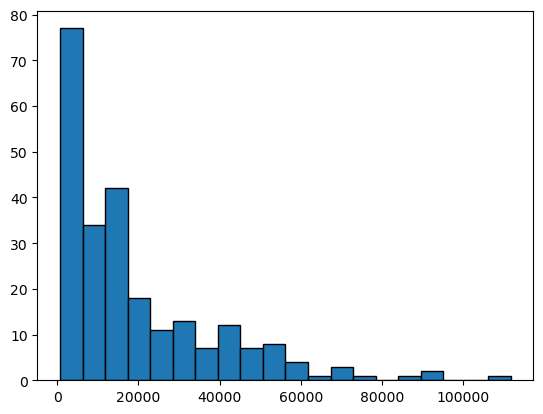

In [27]:
# I added some extra arguments for fine tuning, but the first argument is the only one necessary to create the plot
plt.hist(gdp_2020['Value'], bins = 20, edgecolor='black');

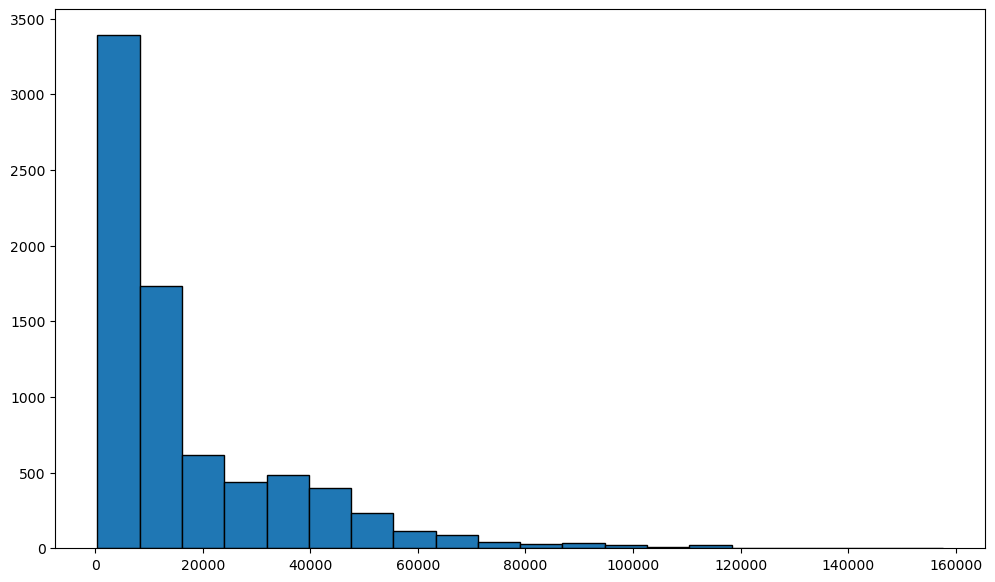

In [28]:
# This is the way the python graph gallery shows this being done
# By assigning fig and ax, you can have control over the 'fig' - in this case, we are changing the size
# subplots have many other uses, this is the simplest
fig, ax = plt.subplots(figsize = (12, 7))
ax.hist(gdp_df['Value'], bins = 20, edgecolor='black');

Density Plot

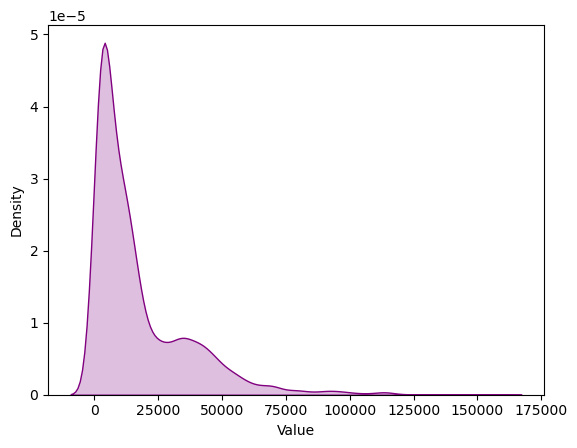

In [30]:
# Again, the first argument is the only one that's mandatory
sns.kdeplot(gdp_df['Value'], fill = True, color = 'purple');

Box Plot

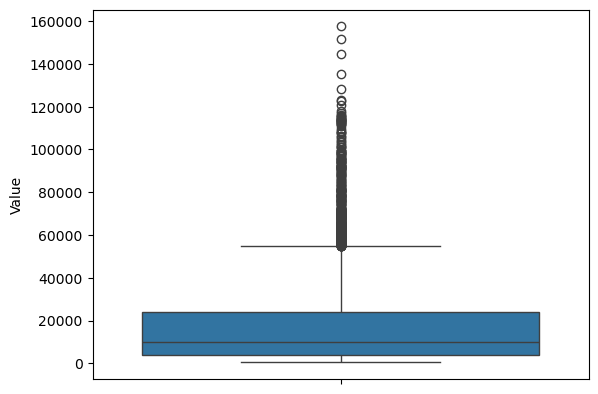

In [32]:
sns.boxplot(y=gdp_df['Value']);

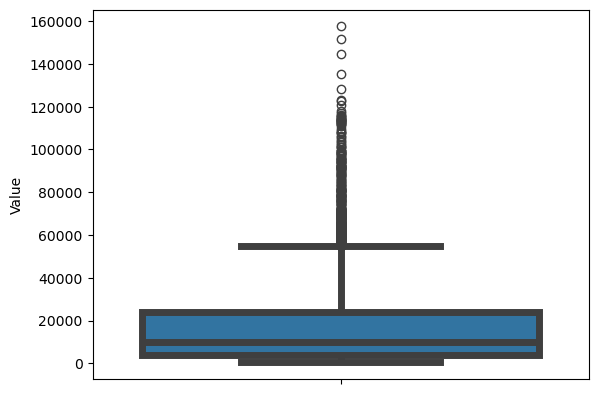

In [33]:
sns.boxplot(y=gdp_df['Value'], linewidth=5);

Violin Plot

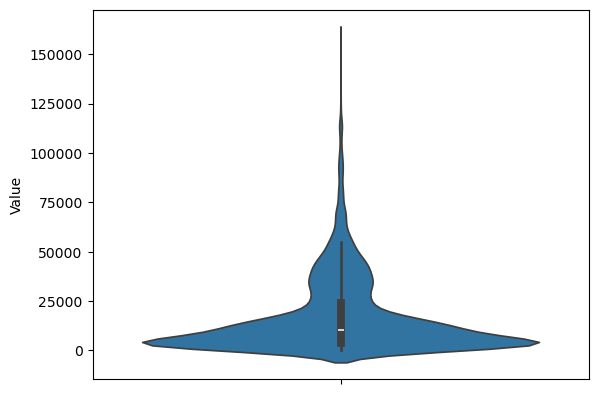

In [35]:
sns.violinplot(y=gdp_df['Value']);

What was the median GDP per capita value in 2020?

In [37]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]
gdp_2020

,Country or Area,Year,Value
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


In [38]:
gdp_2020['Value'].median()

13357.997573370474

In [39]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990,2000,2010,2020])]
gdp_decades

,Country or Area,Year,Value
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


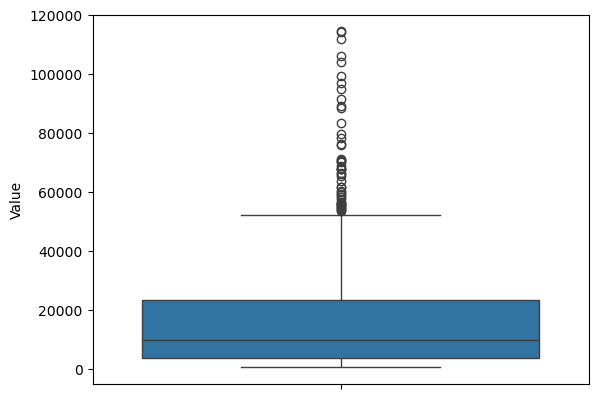

In [40]:
sns.boxplot(y=gdp_decades['Value']);

Bar Plot

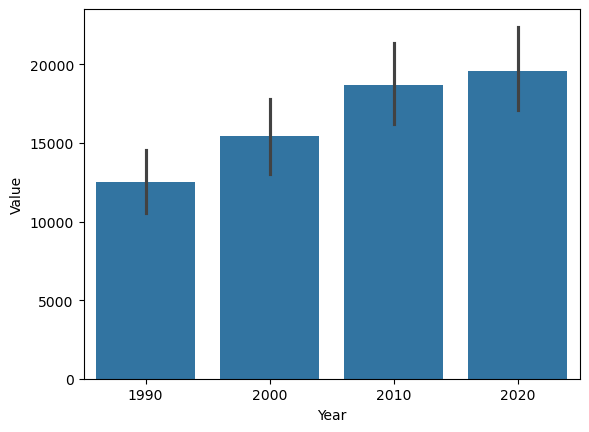

In [42]:
sns.barplot(x=gdp_decades['Year'], y=gdp_decades['Value']);

Scatterplot

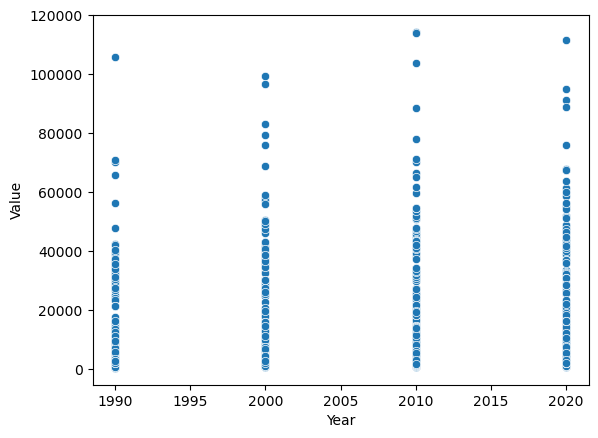

In [44]:
sns.scatterplot(x=gdp_decades['Year'], y=gdp_decades['Value']);

Scatter with trend line

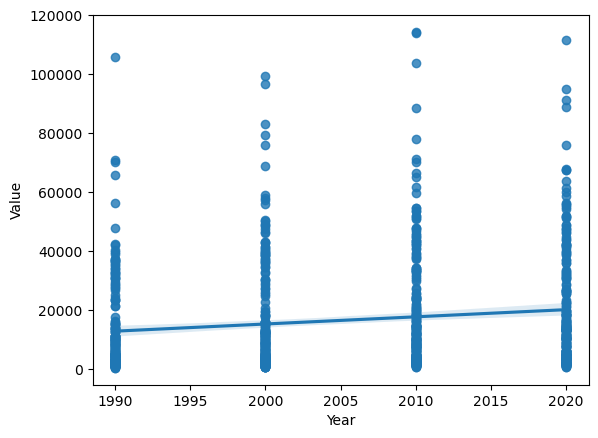

In [46]:
sns.regplot(x=gdp_decades['Year'], y=gdp_decades['Value']);

#### Which country was the first to have a GDP per capita greater than $100,000?

In [48]:
gdp_overtime = gdp_df.sort_values('Year')
gdp_overtime

,Country or Area,Year,Value
7661,Zimbabwe,1990,2704.757299
5391,Pakistan,1990,3061.533388
6808,TÃ¼rkiye,1990,12535.919639
5358,Pacific island small states,1990,5140.322553
711,Bermuda,1990,65961.406278
...,...,...,...
646,Benin,2022,3435.171827
4471,Mauritius,2022,22786.978518
2656,Guinea,2022,2699.128855
4537,Micronesia,2022,3264.934866


In [49]:
gdp_overtime[gdp_overtime['Value'] >= 100000].reset_index(drop=True)

,Country or Area,Year,Value
0,United Arab Emirates,1990,105893.626059
1,United Arab Emirates,1991,101048.696239
2,United Arab Emirates,1997,100956.706467
3,Luxembourg,2001,101143.147977
4,Luxembourg,2002,103317.331098
5,Luxembourg,2003,104743.000088
6,Luxembourg,2004,107634.837198
7,Luxembourg,2005,108632.360016
8,Luxembourg,2006,113346.035782
9,Luxembourg,2007,120647.822959


In [50]:
gdp_100k = gdp_overtime[gdp_overtime['Value'] >= 100000].reset_index()

In [77]:
gdp_100k

,index,Country or Area,Year,Value
0,7302,United Arab Emirates,1990,105893.626059
1,7301,United Arab Emirates,1991,101048.696239
2,7295,United Arab Emirates,1997,100956.706467
3,4167,Luxembourg,2001,101143.147977
4,4166,Luxembourg,2002,103317.331098
5,4165,Luxembourg,2003,104743.000088
6,4164,Luxembourg,2004,107634.837198
7,4163,Luxembourg,2005,108632.360016
8,4162,Luxembourg,2006,113346.035782
9,4161,Luxembourg,2007,120647.822959


#### Which country had the highest GDP per capita in 2020?

In [80]:
gdp_2020['Value'].max()

111751.3147513618

In [82]:
max_gdp_2020 = gdp_2020['Value'].max()

In [84]:
gdp_2020[gdp_2020['Value'] == max_gdp_2020]

,Country or Area,Year,Value
4148,Luxembourg,2020,111751.314751


In [86]:
gdp_2020.loc[gdp_2020['Value'].idxmax()]

Country or Area       Luxembourg
Year                        2020
Value              111751.314751
Name: 4148, dtype: object

In [88]:
gdp_df[gdp_df['Year'] == 2020].nlargest(1, 'Value')

,Country or Area,Year,Value
4148,Luxembourg,2020,111751.314751


#### Creating a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [93]:
gdp_df[gdp_df['Year'] == 2020].nlargest(1, 'Value')['Country or Area'].tolist()[0]

'Luxembourg'

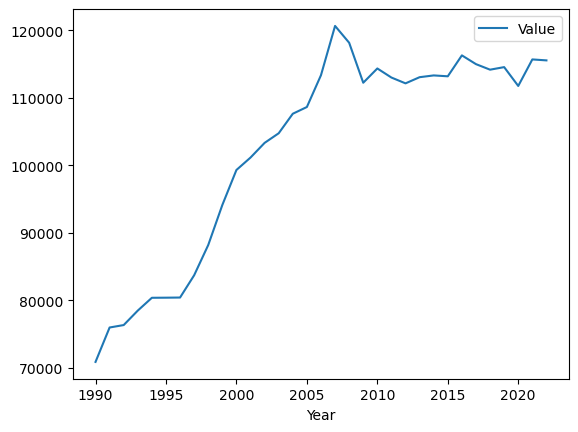

In [95]:
top_country = gdp_df[gdp_df['Year'] == 2020].nlargest(1, 'Value')['Country or Area'].tolist()[0]

gdp_df[gdp_df['Country or Area'] == top_country].plot(x = 'Year', y = 'Value', kind = 'line');

#### Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [98]:
gdp_df[gdp_df['Year'] == 2020].nsmallest(1, 'Value')['Country or Area'].iloc[0]

'Burundi'

(0.0, 1234.4486495300773)

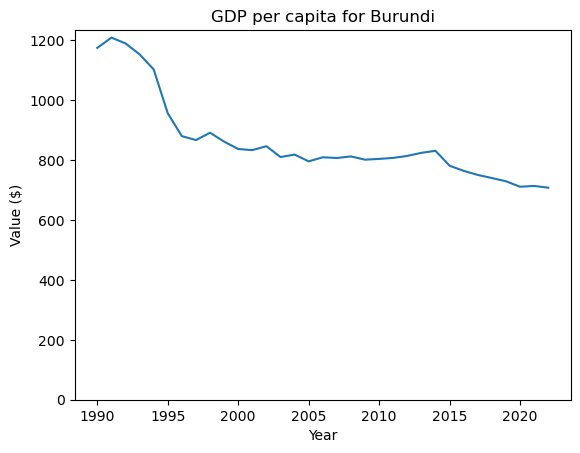

In [100]:
gdp_df_2020_nsmallest = (
    gdp_df[gdp_df['Year'] == 2020]
    .nsmallest(1, 'Value')['Country or Area']
    .iloc[0]
)

selected_country_df = gdp_df.loc[gdp_df['Country or Area'] == gdp_df_2020_nsmallest]

# Plot the change in GDP per capita over time for the selected country
plt.plot(selected_country_df['Year'], selected_country_df['Value'])
plt.title(f"GDP per capita for {gdp_df_2020_nsmallest}")
plt.xlabel("Year")
plt.ylabel("Value ($)")
plt.ylim(ymin=0)

#### Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [103]:
gdp_df[gdp_df['Year'] == 1990]

,Country or Area,Year,Value
52,Africa Eastern and Southern,1990,3037.297466
85,Africa Western and Central,1990,2788.301039
118,Albania,1990,4827.027705
151,Algeria,1990,8828.874473
184,Angola,1990,5793.084512
...,...,...,...
7500,Vanuatu,1990,2774.138350
7533,Viet Nam,1990,2099.394649
7595,World,1990,9705.981267
7628,Zambia,1990,2290.039226


In [105]:
gdp_df[gdp_df['Year'] == 2020]

,Country or Area,Year,Value
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


In [109]:
pd.merge(
    left = gdp_df[gdp_df['Year'] == 1990],
    right = gdp_df[gdp_df['Year'] == 2020],
    on = 'Country or Area',
    suffixes = ['_1990', '_2020']
)

,Country or Area,Year_1990,Value_1990,Year_2020,Value_2020
0,Africa Eastern and Southern,1990,3037.297466,2020,3455.023119
1,Africa Western and Central,1990,2788.301039,2020,3957.933804
2,Albania,1990,4827.027705,2020,13278.369769
3,Algeria,1990,8828.874473,2020,10844.770764
4,Angola,1990,5793.084512,2020,6029.691895
...,...,...,...,...,...
202,Vanuatu,1990,2774.138350,2020,2848.970240
203,Viet Nam,1990,2099.394649,2020,10450.622382
204,World,1990,9705.981267,2020,16204.169107
205,Zambia,1990,2290.039226,2020,3183.650773


In [111]:
# creating a subset of just each year and merging them together with new endings for the columns that will have the same name from both tables
gdp_comparison = pd.merge(
    left = gdp_df[gdp_df['Year'] == 1990],
    right = gdp_df[gdp_df['Year'] == 2020],
    on = 'Country or Area',
    suffixes = ['_1990', '_2020']
)

# creating a new column to indicate if 2020 was lower than 1990
gdp_comparison['2020_lower'] = gdp_comparison['Value_2020'] < gdp_comparison['Value_1990']
gdp_comparison

,Country or Area,Year_1990,Value_1990,Year_2020,Value_2020,2020_lower
0,Africa Eastern and Southern,1990,3037.297466,2020,3455.023119,False
1,Africa Western and Central,1990,2788.301039,2020,3957.933804,False
2,Albania,1990,4827.027705,2020,13278.369769,False
3,Algeria,1990,8828.874473,2020,10844.770764,False
4,Angola,1990,5793.084512,2020,6029.691895,False
...,...,...,...,...,...,...
202,Vanuatu,1990,2774.138350,2020,2848.970240,False
203,Viet Nam,1990,2099.394649,2020,10450.622382,False
204,World,1990,9705.981267,2020,16204.169107,False
205,Zambia,1990,2290.039226,2020,3183.650773,False


In [113]:
gdp_comparison['2020_lower'].value_counts()

2020_lower
False    188
True      19
Name: count, dtype: int64

In [115]:
gdp_comparison[gdp_comparison['2020_lower'] == True]

,Country or Area,Year_1990,Value_1990,Year_2020,Value_2020,2020_lower
15,Barbados,1990,14097.395550,2020,13805.777541,True
25,Brunei,1990,70358.724094,2020,61603.550804,True
28,Burundi,1990,1175.155086,2020,711.355263,True
34,Central African Republic,1990,1200.613390,2020,847.765012,True
41,Congo,1990,5007.319245,2020,3384.654335,True
45,Dem. Rep. Congo,1990,1750.169739,2020,1044.071214,True
66,Fragile and conflict affected situations,1990,4864.814075,2020,4357.621312,True
68,Gabon,1990,17559.006114,2020,13903.288955,True
76,Guinea-Bissau,1990,1998.173206,2020,1803.630591,True
78,Haiti,1990,3612.815105,2020,2970.462845,True


In [117]:
# nrows tells it to stop reading at the row right before things start getting weird
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 6083)

#### Looking at the top and bottom few rows to make sure that it has been read in correctly.

In [120]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


In [122]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN
6082,Zimbabwe,1990,0.000000,NaN


####  Checking the datatypes of the columns.

In [125]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes     object
dtype: object

#### Dropping the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [128]:
internet_df = internet_df.drop(columns = 'Value Footnotes')
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']

#### Looking at the number of observations in this dataset per year. What do you notice?

In [131]:
internet_df.groupby('Year')['Country'].count().sort_index()

Year
1990    226
1991     39
1992     50
1993     66
1994     92
1995    141
1996    177
1997    188
1998    195
1999    207
2000    210
2001    212
2002    214
2003    208
2004    210
2005    212
2006    212
2007    217
2008    214
2009    214
2010    209
2011    214
2012    209
2013    203
2014    204
2015    203
2016    206
2017    205
2018    174
2019    185
2020    186
2021    186
2022    184
2023     11
Name: Country, dtype: int64

#### What is the first year to have a non-zero internet users percentage value?

In [138]:
internet_df[internet_df['Internet_Users_Pct'] > 0].sort_values('Year')

,Country,Year,Internet_Users_Pct
1570,Denmark,1990,0.097277
2892,Japan,1990,0.020294
306,Australia,1990,0.585095
2034,France,1990,0.052778
339,Austria,1990,0.130369
...,...,...,...
427,Bangladesh,2023,44.502700
677,Bosnia and Herzegovina,2023,83.377200
1656,Ecuador,2023,72.694300
1537,Denmark,2023,98.775600


In [140]:
greater_than_0 = internet_df[internet_df['Internet_Users_Pct'] > 0].sort_values('Year')
greater_than_0

,Country,Year,Internet_Users_Pct
1570,Denmark,1990,0.097277
2892,Japan,1990,0.020294
306,Australia,1990,0.585095
2034,France,1990,0.052778
339,Austria,1990,0.130369
...,...,...,...
427,Bangladesh,2023,44.502700
677,Bosnia and Herzegovina,2023,83.377200
1656,Ecuador,2023,72.694300
1537,Denmark,2023,98.775600


#### How does the distribution of internet users percent differ for 2000 and 2014?

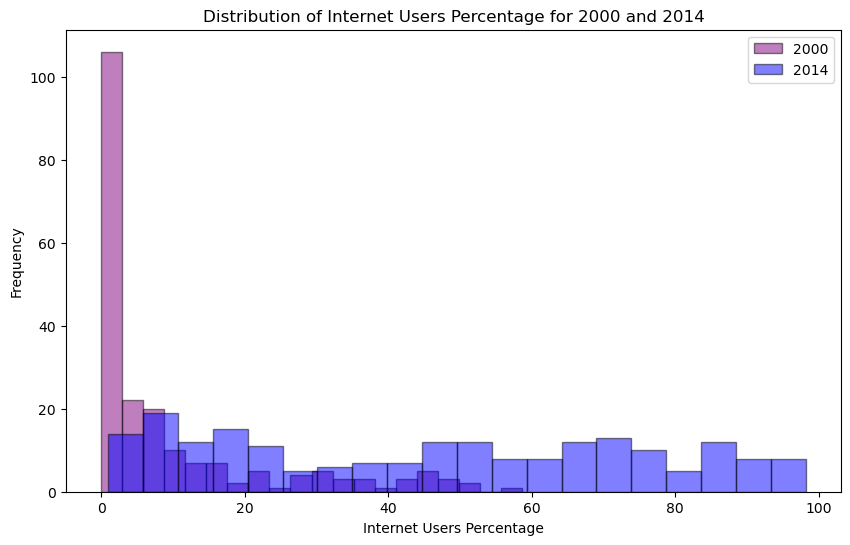

In [143]:
data_2000 = internet_df[internet_df['Year'] == 2000]
data_2014 = internet_df[internet_df['Year'] == 2014]

plt.figure(figsize=(10, 6))

plt.hist(data_2000['Internet_Users_Pct'], alpha=0.5, bins=20, label='2000', color='purple', edgecolor='black')
plt.hist(data_2014['Internet_Users_Pct'], alpha=0.5, bins=20, label='2014', color='blue', edgecolor='black')

plt.xlabel("Internet Users Percentage")
plt.ylabel("Frequency")
plt.title("Distribution of Internet Users Percentage for 2000 and 2014")

plt.legend();

#### For how many countries was the percentage of internet users below 5% in 2014?

In [146]:
internet_df.loc[(internet_df['Year'] == 2014) & (internet_df['Internet_Users_Pct'] < 5)]

,Country,Year,Internet_Users_Pct
873,Burundi,2014,1.04239
1033,Central African Republic,2014,2.70000
1061,Chad,2014,2.90000
1517,Democratic Republic of the Congo,2014,3.00000
1782,Eritrea,2014,0.99000
2451,Guinea-Bissau,2014,3.32000
3364,Madagascar,2014,3.70000
4073,Niger,2014,1.24868
5055,Somalia,2014,1.63000
5116,South Sudan,2014,2.60000


In [148]:
below_5_2014 = internet_df.loc[(internet_df['Year'] == 2014) & (internet_df['Internet_Users_Pct'] < 5)]
below_5_2014

,Country,Year,Internet_Users_Pct
873,Burundi,2014,1.04239
1033,Central African Republic,2014,2.70000
1061,Chad,2014,2.90000
1517,Democratic Republic of the Congo,2014,3.00000
1782,Eritrea,2014,0.99000
2451,Guinea-Bissau,2014,3.32000
3364,Madagascar,2014,3.70000
4073,Niger,2014,1.24868
5055,Somalia,2014,1.63000
5116,South Sudan,2014,2.60000


In [150]:
below_5_2014['Country'].count()

10

#### Merging the two DataFrames to one in a way that keeps all rows from each of the two DataFrames. New DataFrame= gdp_and_internet_use.

In [153]:
gdp_and_internet_use = gdp_df.merge(internet_df, how='outer')

#### Finding the three countries with the highest internet users percentage in 2014.

In [156]:
gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014].nlargest(3, 'Internet_Users_Pct')['Country'].to_list()

['Iceland', 'Iceland', 'Iceland']

In [158]:
# Taking the time here to specify which column we want the info out of and turning it into a list instead of keeping it as a dataframe
# This will save us time with the plotting step.

highest_int_2014 = (
    gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]
    .nlargest(3, 'Internet_Users_Pct')['Country']
    .to_list()
)

highest_int_2014

['Iceland', 'Iceland', 'Iceland']

#### Using a seaborn FacetGrid

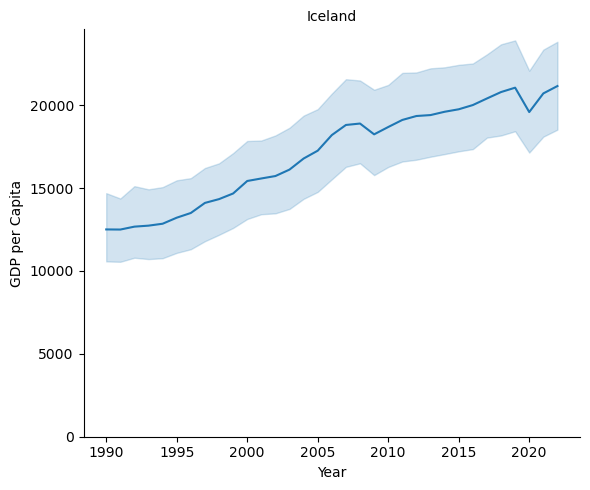

In [162]:
top_3 = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(highest_int_2014)]

g = sns.FacetGrid(top_3, col="Country", hue="Country", height=5, aspect=1.2)
g.map(sns.lineplot, "Year", "Value")

g.set_axis_labels("Year", "GDP per Capita")
g.set_titles(col_template="{col_name}")
g.set(ylim=(0, None));

#### Subsetting gdp_and_internet_use to just the year 2014. Saving as a new dataframe named gdp_and_internet_use_2014.

In [165]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]

#### Creating a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. 

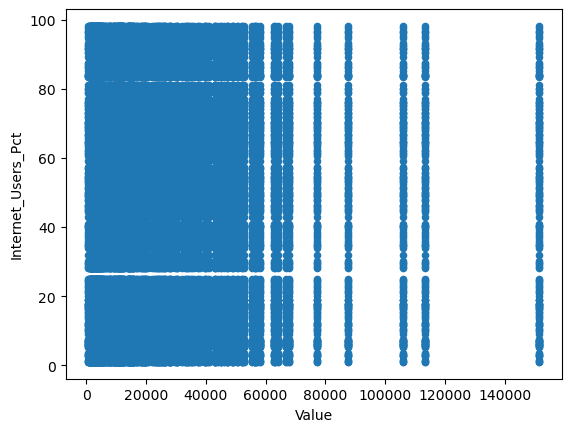

In [168]:
gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014].plot(kind = 'scatter',
                                                               x = 'Value',
                                                               y = 'Internet_Users_Pct');

In [172]:
gdp_and_internet_use.loc[
    (gdp_and_internet_use['Year'] == 2014) &
    (gdp_and_internet_use['Value'] > 25000) &
    (gdp_and_internet_use['Internet_Users_Pct'] < 20)
]

,Country or Area,Year,Value,Country,Internet_Users_Pct
1007065,Aruba,2014,35467.235764,Afghanistan,7.00000
1007080,Aruba,2014,35467.235764,Bangladesh,11.90000
1007085,Aruba,2014,35467.235764,Benin,6.00000
1007094,Aruba,2014,35467.235764,Burkina Faso,6.00000
1007095,Aruba,2014,35467.235764,Burundi,1.04239
...,...,...,...,...,...
1052541,United States,2014,57301.600424,Turkmenistan,12.20000
1052543,United States,2014,57301.600424,Uganda,5.40000
1052550,United States,2014,57301.600424,Vanuatu,18.80000
1052555,United States,2014,57301.600424,Zambia,6.50000


In [174]:
gdp_and_internet_use.loc[
    (gdp_and_internet_use['Year'] == 2014) &
    (gdp_and_internet_use['Value'] > 110000) &
    (gdp_and_internet_use['Internet_Users_Pct'] < 96)
]

,Country or Area,Year,Value,Country,Internet_Users_Pct
1031545,Luxembourg,2014,113313.578898,Afghanistan,7.0000
1031546,Luxembourg,2014,113313.578898,Albania,54.3000
1031547,Luxembourg,2014,113313.578898,Algeria,29.5000
1031548,Luxembourg,2014,113313.578898,Andorra,86.1000
1031549,Luxembourg,2014,113313.578898,Angola,21.3623
...,...,...,...,...,...
1031948,"Macao SAR, China",2014,151616.402364,Viet Nam,41.0000
1031949,"Macao SAR, China",2014,151616.402364,Virgin Islands (US),50.0700
1031950,"Macao SAR, China",2014,151616.402364,Yemen,22.5500
1031951,"Macao SAR, China",2014,151616.402364,Zambia,6.5000


#### Using the qcut function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in gdp_per_capita_2014 into three groups based on their GDP per capita values. Labeling groups as "Low", "Medium", and "High". Putting these labels in a new column, named "GDP_group".

In [177]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014].copy()

gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014['Value'],
        q = 3, labels = ['Low', 'Medium', 'High'])

gdp_and_internet_use_2014

,Country or Area,Year,Value,Country,Internet_Users_Pct,GDP_group
1005025,Afghanistan,2014,2144.449634,Afghanistan,7.0000,Low
1005026,Afghanistan,2014,2144.449634,Albania,54.3000,Low
1005027,Afghanistan,2014,2144.449634,Algeria,29.5000,Low
1005028,Afghanistan,2014,2144.449634,Andorra,86.1000,Low
1005029,Afghanistan,2014,2144.449634,Angola,21.3623,Low
...,...,...,...,...,...,...
1054388,Zimbabwe,2014,2316.954536,Viet Nam,41.0000,Low
1054389,Zimbabwe,2014,2316.954536,Virgin Islands (US),50.0700,Low
1054390,Zimbabwe,2014,2316.954536,Yemen,22.5500,Low
1054391,Zimbabwe,2014,2316.954536,Zambia,6.5000,Low


#### How does the median internet users percentage compare for the three gdp groups?

In [180]:
gdp_and_internet_use_2014.groupby('GDP_group')['Internet_Users_Pct'].median()

C:\Users\ericj\AppData\Local\Temp\ipykernel_8552\1179629846.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gdp_and_internet_use_2014.groupby('GDP_group')['Internet_Users_Pct'].median()


GDP_group
Low       46.818
Medium    46.818
High      46.818
Name: Internet_Users_Pct, dtype: float64